In [1]:
import matplotlib.pyplot as plt
import numpy as np

import deepxde as dde
from deepxde.backend import tf
import math

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



In [2]:
def pde(x, y):
    dy_x = tf.gradients(y, x)[0]
    dy_x, dy_y = dy_x[:, 0:1], dy_x[:, 1:]
    dy_xx = tf.gradients(dy_x, x)[0][:, 0:1]
    dy_yy = tf.gradients(dy_y, x)[0][:, 1:]
    return -dy_xx - dy_yy

In [3]:
pi=math.pi

In [4]:
a=3*pi

In [6]:
b=pi

In [7]:
geom = dde.geometry.Rectangle([0, 0], [9.42, 3.14])

In [8]:
def boundary(_, on_boundary):
    return on_boundary

In [13]:
def boundary_bottom(x, on_boundary):
    return on_boundary and np.isclose(x[1], 0) 

In [14]:
def boundary_left(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)  

In [15]:
def boundary_top(x, on_boundary):
    return on_boundary and np.isclose(x[1], 3.14)

In [16]:
def boundary_right(x, on_boundary):
    return on_boundary and np.isclose(x[0], 9.42)

In [17]:
###conditionals
def func1(x):

     return np.sin(x[:,0:1]) / np.sin(9.42)

In [18]:
###conditionals
def func2(x):
     
    return np.sinh( x[:,1:2]) / np.sinh(3.14 )

In [19]:
def func3(x):
     num_data = x.shape[0]
     return np.zeros((num_data,1))

In [20]:
bc_1=dde.DirichletBC(geom,func1,boundary_top)

In [21]:
bc_2=dde.DirichletBC(geom,func2,boundary_right)

In [22]:
bc_3=dde.DirichletBC(geom,func3,boundary_bottom)

In [23]:
bc_4=dde.DirichletBC(geom,func3,boundary_left)

In [24]:
data = dde.data.PDE(geom, pde, [bc_2, bc_1, bc_3,bc_4], num_domain=60000, num_boundary=6000, num_test=15000)

In [25]:
#data = dde.data.PDE(geom, pde, [bc_1, bc_2, bc_3,bc_4], num_domain=60000, num_boundary=60000)

In [27]:
net = dde.maps.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

In [28]:
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(epochs=2000)
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
Building feed-forward neural network...
'build' took 0.081864 s



C:\Users\Akash\anaconda3\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.893001 s

Initializing variables...
Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [4.98e-03, 5.49e-02, 2.19e+04, 5.29e-02, 1.03e-02]    [5.24e-03, 5.49e-02, 2.19e+04, 5.29e-02, 1.03e-02]    []  
1000      [2.21e+02, 2.37e+02, 9.35e+03, 3.55e+00, 6.35e+00]    [1.69e+02, 2.37e+02, 9.35e+03, 3.55e+00, 6.35e+00]    []  
2000      [1.71e+02, 1.32e+02, 4.81e+03, 6.23e+00, 1.73e+01]    [7.59e+01, 1.32e+02, 4.81e+03, 6.23e+00, 1.73e+01]    []  

Best model at step 2000:
  train loss: 5.14e+03
  test loss: 5.04e+03
  test metric: []

'train' took 1622.535670 s

Compiling model...
'compile' took 0.839494 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
2000      [1.71e+02, 1.32e+02, 4.81e+03, 6.23e+00, 1.73e+01]    [7.59e+01, 1.32e+02, 4.81e+03, 6.23e+00, 1.73e+01]  

In [29]:
x_data=np.linspace(0,9.42,num=1000)

In [30]:
y_data=np.linspace(0,3.14,num=1000)

In [31]:
test_x,test_y = np.meshgrid(x_data,y_data)

In [32]:
test_domain=np.vstack((np.ravel(test_x),np.ravel(test_y))).T

In [33]:
predicted_solution=model.predict(test_domain)

In [34]:
residual=model.predict(test_domain,operator=pde)

In [36]:
residual = residual.reshape(1000, 1000)

In [37]:
predicted_solution = predicted_solution.reshape(1000, 1000)/np.max(predicted_solution)

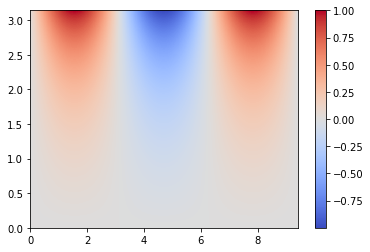

In [38]:
plt.pcolor(test_x, test_y, predicted_solution,cmap='coolwarm')
plt.colorbar()
plt.show()

In [41]:
import pandas as pd

In [45]:
prediction = pd.DataFrame(predicted_solution)
prediction.shape

(1000, 1000)

In [43]:
prediction.to_csv("predictionpinn.csv")

In [46]:
error = pd.DataFrame(residual)
error.shape

(1000, 1000)

In [ ]:
#layer_size=[2]+[64]*3+[1]
#activation='tanh'
#net=dde.maps.FNN(layer_size,activation,intializer)

In [ ]:

#model=dde.Model(data,net)

In [ ]:
#compile the model
#model.compile("adam", lr=0.0001)
#model.train(epochs=1000)


In [ ]:
#train model
#losshistory,train_state = model.train(epochs=1000)